# Modelling Bioethanol Production


This notebook shows the implementation of inhibition models for bioethanol production process from cassava. This example is availabe on Book from Schmidell et al (2001), entitled Industrial Biotechnology  (v2, 2001, p. 135, chap 7).

Experimental data presented in the book were extracted by using the tool [Webplot Digitalizer](https://automeris.io/WebPlotDigitizer/)

In [1]:
import numpy as np
from numpy import log as ln
from numpy import arange,array,ones 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
from math import*
from sklearn.linear_model import LinearRegression
from scipy import interpolate
from scipy import stats
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Open data from experiment

In [2]:
assay_1 = pd.read_csv('assay_1.csv', encoding='utf-8', decimal=',', sep=' ', header=None)
assay_2 = pd.read_csv('assay_2.csv', encoding='utf-8', decimal=',', sep=' ', header=None)
assay_3 = pd.read_csv('assay_3.csv', encoding='utf-8', decimal=',', sep=' ', header=None)
assay_4 = pd.read_csv('assay_4.csv', encoding='utf-8', decimal=',', sep=' ', header=None)

## Checking experimental data

In [3]:
assay_1

,0,1,2,3
0,0.0,0.378,1.92,20.800
1,1.0,0.652,2.54,17.600
2,2.0,1.170,3.54,14.800
3,3.0,1.540,4.65,10.300
4,4.0,1.840,5.96,5.800
5,5.0,2.360,6.64,2.340
6,6.0,2.200,7.19,0.512
7,7.0,2.230,6.74,0.088


In [4]:
assay_2

,0,1,2,3
0,0.0,0.845,2.44,85.100
1,1.0,1.080,2.88,76.800
2,2.0,1.880,3.54,76.300
3,3.0,2.980,5.34,74.800
4,4.0,3.920,7.52,56.900
5,5.0,5.770,10.50,42.200
6,6.0,7.140,17.60,28.800
7,7.0,10.600,22.80,7.650
8,8.0,10.300,24.70,0.198
9,9.0,7.700,24.40,0.002


In [5]:
assay_3

,0,1,2,3
0,0.0,0.410,2.71,136.000
1,1.0,0.819,2.78,130.000
2,2.0,1.140,3.06,131.000
3,3.0,1.720,3.43,134.000
4,4.0,2.570,4.78,130.000
5,5.0,4.010,6.78,120.000
6,6.0,4.680,8.34,106.000
7,7.0,6.600,11.70,100.000
8,8.0,9.510,15.40,69.800
9,9.0,12.600,23.00,47.500


In [6]:
assay_4

,0,1,2,3
0,0.0,1.12,2.02,227.000
1,1.0,1.29,2.56,236.000
2,2.0,2.29,2.90,221.000
3,3.0,2.68,3.82,213.000
4,4.0,4.36,4.44,198.000
5,5.0,6.18,6.69,198.000
6,6.0,7.70,9.31,195.000
7,7.0,11.10,11.30,178.000
8,8.0,13.60,15.20,160.000
9,9.0,18.30,21.00,123.000


## Transforming data in arrays

In [7]:
time_assay_1 = assay_1 [0]
biomass_assay_1 = assay_1[1]
product_assay_1 = assay_1[2]
substrate_assay_1 = assay_1[3]

In [8]:
time_assay_2 = assay_2 [0]
biomass_assay_2 = assay_2[1]
product_assay_2 = assay_2[2]
substrate_assay_2 = assay_2[3]

In [9]:
time_assay_3 = assay_3 [0]
biomass_assay_3 = assay_3[1]
product_assay_3 = assay_3[2]
substrate_assay_3 = assay_3[3]

In [10]:
time_assay_4 = assay_4 [0]
biomass_assay_4 = assay_4[1]
product_assay_4 = assay_4[2]
substrate_assay_4 = assay_4[3]

# Estimating specific growth rates (umax)

In [11]:
#assay 1: umax for times 2, 3 4 and 5 h of exponencial growth (Table 7.3, pg 140 )
ln_biomass_assay_1 = np.log(biomass_assay_1)
coef_a1_2h,coef_b1_2h = np.polyfit(time_assay_1[0:3], ln_biomass_assay_1[0:3], 1)
coef_a1_3h,coef_b1_3h = np.polyfit(time_assay_1[0:4], ln_biomass_assay_1[0:4], 1)
coef_a1_4h,coef_b1_4h = np.polyfit(time_assay_1[0:5], ln_biomass_assay_1[0:5], 1)
coef_a1_5h,coef_b1_5h = np.polyfit(time_assay_1[0:6], ln_biomass_assay_1[0:6], 1)
print("umax1 t=2h")
print (coef_a1_2h)
#print (coef_b1_2h)
print("umax1 t=3h")
print (coef_a1_3h)
#print (coef_b1_3h)
print("umax1 t=4h")
print (coef_a1_4h)
#print (coef_b1_4h)
print("umax1 t=5h")
print (coef_a1_5h)
#print (coef_b1_5h)

umax1 t=2h
0.564932416086107
umax1 t=3h
0.47986449652294094
umax1 t=4h
0.4024746443447911
umax1 t=5h
0.35842345844700985


In [12]:
#assay 2: umax for times 2h of exponencial growth 
ln_biomass_assay_2 = np.log(biomass_assay_2)
coef_a2_2h,coef_b2_2h = np.polyfit(time_assay_2[0:3], ln_biomass_assay_2[0:3], 1)
print("umax_2 t=2h")
print (coef_a2_2h)
#print (coef_b2_2h)

#assay 3: umax for times 2h of exponencial growth 
ln_biomass_assay_3 = np.log(biomass_assay_3)
coef_a3_2h,coef_b3_2h = np.polyfit(time_assay_3[0:3], ln_biomass_assay_3[0:3], 1)
print("umax_3 t=2h")
print (coef_a3_2h)
#print (coef_b3_2h)

#assay 4: umax for times 2h of exponencial growth 
ln_biomass_assay_4 = np.log(biomass_assay_4)
coef_a4_2h,coef_b4_2h = np.polyfit(time_assay_4[0:3], ln_biomass_assay_4[0:3], 1)
print("umax_4 t=2h")
print (coef_a4_2h)
#print (coef_b4_2h)

umax_2 t=2h
0.3998452142334105
umax_3 t=2h
0.5113131908450937
umax_4 t=2h
0.3576115661295725


In [13]:
#Estimation of uP for time 2h  during bacterial exponencial growth 

#assay 1:
ln_product_assay_1 = np.log(product_assay_1)
coef_a1p_2h,coef_b1p_2h = np.polyfit(time_assay_1[0:3], ln_product_assay_1[0:3], 1)
print("uP_1 t=2h")
print (coef_a2_2h)
#print (coef_b2p_2h)

#assay 2:
ln_product_assay_2 = np.log(product_assay_2)
coef_a2p_2h,coef_b2p_2h = np.polyfit(time_assay_2[0:3], ln_product_assay_2[0:3], 1)
print("uP_2 t=2h")
print (coef_a2p_2h)
#print (coef_b2p_2h)

#assay 3:
ln_product_assay_3 = np.log(product_assay_3)
coef_a3p_2h,coef_b3p_2h = np.polyfit(time_assay_3[0:3], ln_product_assay_3[0:3], 1)
print("uP_3 t=2h")
print (coef_a3p_2h)
#print (coef_b3p_2h)


#assay 4:
ln_product_assay_4 = np.log(product_assay_4)
coef_a4p_2h,coef_b4p_2h = np.polyfit(time_assay_4[0:3], ln_product_assay_4[0:3], 1)
print("uP_4 t=2h")
print (coef_a4p_2h)
#print (coef_b4p_2h)

uP_1 t=2h
0.3998452142334105
uP_2 t=2h
0.18606434392028637
uP_3 t=2h
0.06073314053633977
uP_4 t=2h
0.1808066127896575


In [14]:
#Initial Parameters to run model, considering umax for each timestep interval

#assay_1
ln_biomass_assay_1 = np.log(biomass_assay_1)
coef_a1_2hr,coef_b1_2h = np.polyfit(time_assay_1[0:3], ln_biomass_assay_1[0:3], 1)
coef_a1_3hr,coef_b1_3h = np.polyfit(time_assay_1[2:4], ln_biomass_assay_1[2:4], 1)
coef_a1_4hr,coef_b1_4h = np.polyfit(time_assay_1[3:5], ln_biomass_assay_1[3:5], 1)
coef_a1_5hr,coef_b1_5h = np.polyfit(time_assay_1[4:6], ln_biomass_assay_1[4:6], 1)
uxMax_assay_1 = [coef_a1_2hr, coef_a1_3hr, coef_a1_4hr, coef_a1_5hr]
initialCbio = 0.378 #g/L
dt = 1.0 #h

# Creating a function in order to check experimental values vs. those obtained by umax recovery

In [15]:
def computeParameters(cBio, timestep):   
  
    #log phase growth equation
    if timestep < 2.0:
        cBio = cBio * math.exp(uxMax_assay_1[0] * dt)
        return [cBio]
    if (timestep >= 2.0 and timestep < 3.0):
        cBio = cBio * math.exp(uxMax_assay_1[1] * dt)
        return [cBio]
    if timestep >= 3.0 and timestep < 4.0:
        cBio = cBio * math.exp(uxMax_assay_1[2] * dt)
        return [cBio]
    if timestep >= 4.0:
        cBio = cBio * math.exp(uxMax_assay_1[3] * dt)
        return [cBio]

In [16]:
#if __name__ == "__main__":
    timesteps = np.arange(0, 6.0, dt) # hrs
    biomassConcentration = np.array([initialCbio])

# loop collideAndStream
    count = 0
    for timestep in timesteps:
        [cBio] = computeParameters(biomassConcentration[-1], timestep)

        biomassConcentration = np.append(biomassConcentration, cBio) 
        count += 1

    biomassConcentration = np.delete(biomassConcentration, 0)

In [17]:
biomassConcentration  

array([0.66502632, 1.17      , 1.54      , 1.84      , 2.36      ,
       3.02695652])

In [18]:
biomass_assay_1

0    0.378
1    0.652
2    1.170
3    1.540
4    1.840
5    2.360
6    2.200
7    2.230
Name: 1, dtype: float64

# Ploting data: Experimental vs. Estimated


(0, 3)

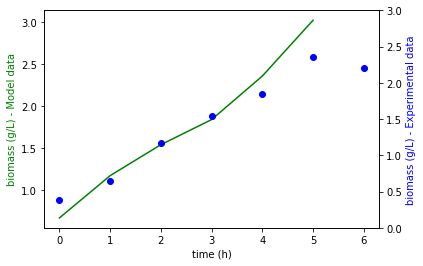

In [19]:
# This figure can be compared with fig. 7.3 from book (pg. 141)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(timesteps, biomassConcentration, 'g-')
ax2.plot(time_assay_1[0:7], biomass_assay_1[0:7], 'bo')
ax1.set_xlabel('time (h)')
ax1.set_ylabel('biomass (g/L) - Model data', color='g')
ax2.set_ylabel('biomass (g/L) - Experimental data', color='b')
ax2.set_ylim (0, 3)

# Recovering uX, uP and uS from experimental data : Geometric Method

In [20]:
#uX

uX_assay_1 = np.diff(biomass_assay_1)/biomass_assay_1[1:]
print ('uX_assay_1')
print (uX_assay_1)

uX_assay_2 = np.diff(biomass_assay_2)/biomass_assay_2[1:]
print ('uX_assay_2')
print (uX_assay_2)

uX_assay_3 = np.diff(biomass_assay_3)/biomass_assay_3[1:]
print ('uX_assay_3')
print (uX_assay_3)

uX_assay_4 = np.diff(biomass_assay_4)/biomass_assay_4[1:]
print ('uX_assay_4')
print (uX_assay_4)

uX_assay_1
1    0.420245
2    0.442735
3    0.240260
4    0.163043
5    0.220339
6   -0.072727
7    0.013453
Name: 1, dtype: float64
uX_assay_2
1    0.217593
2    0.425532
3    0.369128
4    0.239796
5    0.320624
6    0.191877
7    0.326415
8   -0.029126
9   -0.337662
Name: 1, dtype: float64
uX_assay_3
1     0.499389
2     0.281579
3     0.337209
4     0.330739
5     0.359102
6     0.143162
7     0.290909
8     0.305994
9     0.245238
10   -0.024390
11    0.133803
12    0.065789
Name: 1, dtype: float64
uX_assay_4
1     0.131783
2     0.436681
3     0.145522
4     0.385321
5     0.294498
6     0.197403
7     0.306306
8     0.183824
9     0.256831
10    0.016129
11    0.165919
12    0.254181
13   -0.186508
Name: 1, dtype: float64


In [21]:
#uP

uP_assay_1 = np.diff(product_assay_1)/product_assay_1[1:]
print ('uP_assay_1')
print (uP_assay_1)

uP_assay_2 = np.diff(product_assay_2)/product_assay_2[1:]
print ('uP_assay_2')
print (uP_assay_2)

uP_assay_3 = np.diff(product_assay_3)/product_assay_3[1:]
print ('uP_assay_3')
print (uP_assay_3)

uP_assay_4 = np.diff(product_assay_4)/product_assay_4[1:]
print ('uP_assay_4')
print (uP_assay_4)

uP_assay_1
1    0.244094
2    0.282486
3    0.238710
4    0.219799
5    0.102410
6    0.076495
7   -0.066766
Name: 2, dtype: float64
uP_assay_2
1    0.152778
2    0.186441
3    0.337079
4    0.289894
5    0.283810
6    0.403409
7    0.228070
8    0.076923
9   -0.012295
Name: 2, dtype: float64
uP_assay_3
1     0.025180
2     0.091503
3     0.107872
4     0.282427
5     0.294985
6     0.187050
7     0.287179
8     0.240260
9     0.330435
10    0.181495
11    0.264398
12   -0.013263
Name: 2, dtype: float64
uP_assay_4
1     0.210938
2     0.117241
3     0.240838
4     0.139640
5     0.336323
6     0.281418
7     0.176106
8     0.256579
9     0.276190
10    0.326923
11    0.208122
12    0.267658
13    0.011029
Name: 2, dtype: float64


In [22]:
#uS

uS_assay_1 = np.diff(substrate_assay_1)/substrate_assay_1[1:]
print ('uS_assay_1')
print (uS_assay_1)

uS_assay_2 = np.diff(substrate_assay_2)/substrate_assay_2[1:]
print ('uS_assay_2')
print (uS_assay_2)

uS_assay_3 = np.diff(substrate_assay_3)/substrate_assay_3[1:]
print ('uS_assay_3')
print (uS_assay_3)

uS_assay_4 = np.diff(substrate_assay_4)/substrate_assay_4[1:]
print ('uS_assay_4')
print (uS_assay_4)

uS_assay_1
1   -0.181818
2   -0.189189
3   -0.436893
4   -0.775862
5   -1.478632
6   -3.570312
7   -4.818182
Name: 3, dtype: float64
uS_assay_2
1    -0.108073
2    -0.006553
3    -0.020053
4    -0.314587
5    -0.348341
6    -0.465278
7    -2.764706
8   -37.636364
9   -98.000000
Name: 3, dtype: float64
uS_assay_3
1      -0.046154
2       0.007634
3       0.022388
4      -0.030769
5      -0.083333
6      -0.132075
7      -0.060000
8      -0.432665
9      -0.469474
10     -1.595628
11    -21.536946
12   -269.666667
Name: 3, dtype: float64
uS_assay_4
1       0.038136
2      -0.067873
3      -0.037559
4      -0.075758
5       0.000000
6      -0.015385
7      -0.095506
8      -0.112500
9      -0.300813
10     -0.609948
11     -0.653680
12     -2.882353
13   -219.370370
Name: 3, dtype: float64


In [23]:
#We must consider that for assay_1, at t=0, uX = uxMax = 0.5649. So we need to append this value in the array
uX_1 = np.append(coef_a1_2h, uX_assay_1)
uX_2 = np.append(coef_a2_2h, uX_assay_2)
uX_3 = np.append(coef_a3_2h, uX_assay_3)
uX_4 = np.append(coef_a4_2h, uX_assay_4)
print (uX_2)

[ 0.39984521  0.21759259  0.42553191  0.36912752  0.23979592  0.32062392
  0.19187675  0.32641509 -0.02912621 -0.33766234]


In [24]:
#Up coefficients
uP_1 = np.append(coef_a1p_2h, uP_assay_1)
uP_2 = np.append(coef_a2p_2h, uP_assay_2)
uP_3 = np.append(coef_a3p_2h, uP_assay_3)
uP_4 = np.append(coef_a4p_2h, uP_assay_4)
print (uP_1)

[ 0.30590077  0.24409449  0.28248588  0.23870968  0.21979866  0.10240964
  0.07649513 -0.06676558]


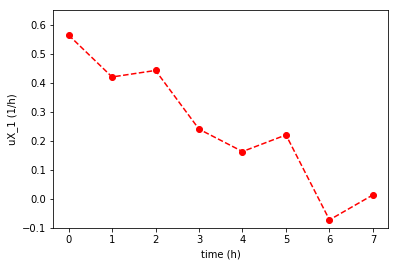

In [25]:
# Now we plot values for uX vs.time. 
#This figure can be compared with fig. 7.4 from book (pg. 141)
fig, ax1 = plt.subplots()
ax1.plot(time_assay_1, uX_1, 'ro--')
ax1.set_xlabel('time (h)')
ax1.set_ylabel('uX_1 (1/h)')
ax1.set_ylim (-0.1, .65)
plt.show()

Now, lets compute uX and P for  substrate residual values of 10 and 20 mg/L
Values presented here show a small difference compared to Table 7.4. It can be explained due to the interpolation method odopted even the accuracy of computational tools applyed.

First step is to interpolate experimental data, thus we need to import the library 'interpolate'

### Assay_1

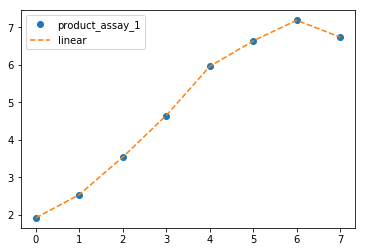

In [26]:
#product_1
f_product_assay_1 = interpolate.interp1d(time_assay_1, product_assay_1,kind = 'linear')
new_time_assay_1 = np.linspace(0, 7,1000)
plt.plot(time_assay_1, product_assay_1, 'o', new_time_assay_1, f_product_assay_1(new_time_assay_1), '--')
plt.legend(['product_assay_1', 'linear'], loc = 'best')
plt.show()

In [27]:
resid20g_product_assay_1 = f_product_assay_1(new_time_assay_1)[36:37]
resid10g_product_assay_1 = f_product_assay_1(new_time_assay_1)[438:439]
print (resid20g_product_assay_1)
print (resid10g_product_assay_1)

[2.0763964]
[4.74048048]


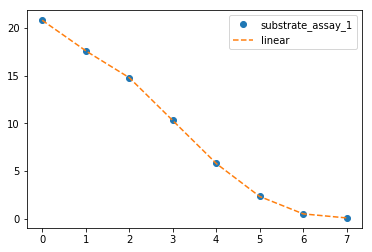

In [28]:
#substrate_1
f_substrate_assay_1 = interpolate.interp1d(time_assay_1, substrate_assay_1,kind = 'linear')
new_time_assay_1 = np.linspace(0, 7,1000)
plt.plot(time_assay_1, substrate_assay_1, 'o', new_time_assay_1, f_substrate_assay_1(new_time_assay_1), '--')
plt.legend(['substrate_assay_1', 'linear'], loc = 'best')
plt.show()

In [29]:
resid20g_substrate_assay_1 = f_substrate_assay_1(new_time_assay_1)[35:36]
resid10g_substrate_assay_1 = f_substrate_assay_1(new_time_assay_1)[438:439]
print (resid20g_substrate_assay_1)
print (resid10g_substrate_assay_1)

[20.01521522]
[9.98918919]


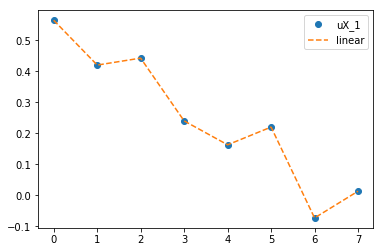

In [30]:
#uX_1
f_uX_1 = interpolate.interp1d(time_assay_1, uX_1,kind = 'linear')
new_time_assay_1 = np.linspace(0, 7,1000)
plt.plot(time_assay_1, uX_1, 'o', new_time_assay_1, f_uX_1(new_time_assay_1), '--')
plt.legend(['uX_1', 'linear'], loc = 'best')
plt.show()


In [31]:
resid20g_uX_1 = f_uX_1(new_time_assay_1)[35:36]
resid10g_uX_1 = f_uX_1(new_time_assay_1)[438:439]
print (resid20g_uX_1)
print (resid10g_uX_1)

[0.52944861]
[0.23492648]


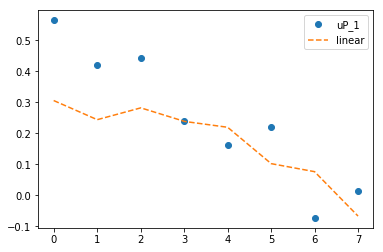

In [32]:
#uP_1
f_uP_1 = interpolate.interp1d(time_assay_1, uP_1,kind = 'linear')
new_time_assay_1 = np.linspace(0, 7,1000)
plt.plot(time_assay_1, uX_1, 'o', new_time_assay_1, f_uP_1(new_time_assay_1), '--')
plt.legend(['uP_1', 'linear'], loc = 'best')
plt.show()

In [33]:
resid20g_uP_1 = f_uP_1(new_time_assay_1)[35:36]
resid10g_uP_1 = f_uP_1(new_time_assay_1)[438:439]
print (resid20g_uP_1)
print (resid10g_uP_1)

[0.29074307]
[0.23740351]


### Assay_2

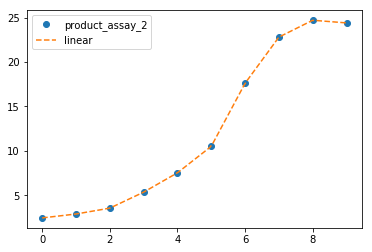

In [34]:
#product_2
f_product_assay_2 = interpolate.interp1d(time_assay_2, product_assay_2,kind = 'linear')
new_time_assay_2 = np.linspace(0, 9,99)
plt.plot(time_assay_2, product_assay_2, 'o', new_time_assay_2, f_product_assay_2(new_time_assay_2), '--')
plt.legend(['product_assay_2', 'linear'], loc = 'best')
plt.show()

In [35]:
resid20g_product_assay_2 = f_product_assay_2(new_time_assay_2)[70:71]
resid10g_product_assay_2 = f_product_assay_2(new_time_assay_2)[75:76]
print (resid20g_product_assay_2)
print (resid10g_product_assay_2)

[19.82857143]
[22.21632653]


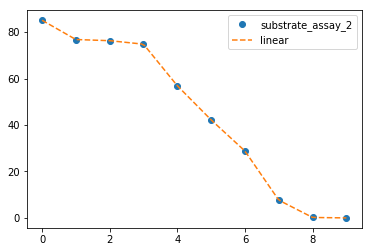

In [36]:
#substrate_2
f_substrate_assay_2 = interpolate.interp1d(time_assay_2, substrate_assay_2,kind = 'linear')
new_time_assay_2 = np.linspace(0, 9,99)
plt.plot(time_assay_2, substrate_assay_2, 'o', new_time_assay_2, f_substrate_assay_2(new_time_assay_2), '--')
plt.legend(['substrate_assay_2', 'linear'], loc = 'best')
plt.show()

In [37]:
resid20g_substrate_assay_2 = f_substrate_assay_2(new_time_assay_2)[70:71]
resid10g_substrate_assay_2 = f_substrate_assay_2(new_time_assay_2)[75:76]
print (resid20g_substrate_assay_2)
print (resid10g_substrate_assay_2)

[19.73571429]
[10.02397959]


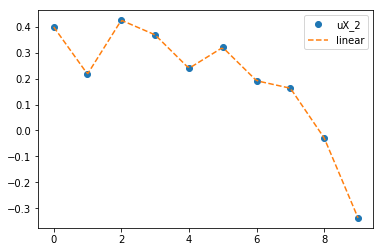

In [38]:
# Replacing values by the mean in time 7hrs
#uX_2
new_uX_2 = np.average(uX_2[6:9])
#print (new_uX_2)
uX_2_ =  np.where(uX_2==uX_2[7:8],new_uX_2, uX_2)
#print (uX_2_)
f_uX_2 = interpolate.interp1d(time_assay_2, uX_2_,kind = 'linear')
new_time_assay_2 = np.linspace(0, 9,99)
plt.plot(time_assay_2, uX_2_, 'o', new_time_assay_2, f_uX_2(new_time_assay_2), '--')
plt.legend(['uX_2', 'linear'], loc = 'best')
plt.show()

In [39]:
resid20g_uX_2 = f_uX_2(new_time_assay_2)[70:71]
resid10g_uX_2 = f_uX_2(new_time_assay_2)[75:76]
print (resid20g_uX_2)
print (resid10g_uX_2)

[0.17952466]
[0.16629028]


### Assay_3

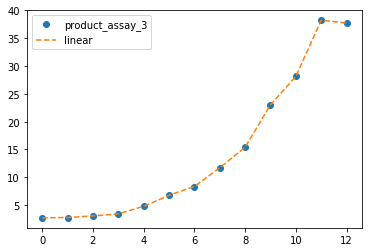

In [40]:
#product_3
f_product_assay_3 = interpolate.interp1d(time_assay_3, product_assay_3,kind = 'linear')
new_time_assay_3 = np.linspace(0, 12,560)
plt.plot(time_assay_3, product_assay_3, 'o', new_time_assay_3, f_product_assay_3(new_time_assay_3), '--')
plt.legend(['product_assay_3', 'linear'], loc = 'best')
plt.show()

In [41]:
resid20g_product_assay_3 = f_product_assay_3(new_time_assay_3)[463:464]
resid10g_product_assay_3 = f_product_assay_3(new_time_assay_3)[488:489]
print (resid20g_product_assay_3)
print (resid10g_product_assay_3)

[27.78980322]
[32.90608229]


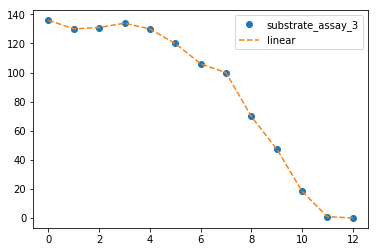

In [42]:
#substrate_3
f_substrate_assay_3 = interpolate.interp1d(time_assay_3, substrate_assay_3,kind = 'linear')
new_time_assay_3 = np.linspace(0, 12,560)
plt.plot(time_assay_3, substrate_assay_3, 'o', new_time_assay_3, f_substrate_assay_3(new_time_assay_3), '--')
plt.legend(['substrate_assay_3', 'linear'], loc = 'best')
plt.show()

In [43]:
resid20g_substrate_assay_3 = f_substrate_assay_3(new_time_assay_3)[463:464]
resid10g_substrate_assay_3 = f_substrate_assay_3(new_time_assay_3)[488:489]
print (resid20g_substrate_assay_3)
print (resid10g_substrate_assay_3)

[20.07602862]
[9.97833989]


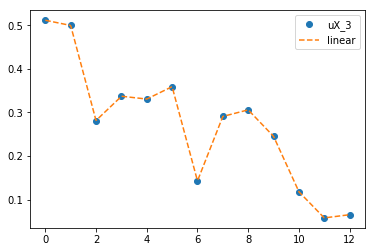

In [44]:
# Replacing values by the mean in time 10 and 11hrs

a_uX_3 = np.average(uX_3[9:12])
uX_3_ =  np.where(uX_3==uX_3[10:11],a_uX_3, uX_3)
b_uX_3 = np.average(uX_3[10:13])
uX_3_b =  np.where(uX_3_==uX_3_[11:12],b_uX_3, uX_3_)

f_uX_3 = interpolate.interp1d(time_assay_3, uX_3_b,kind = 'linear')
new_time_assay_3 = np.linspace(0, 12,560)
plt.plot(time_assay_3, uX_3_b, 'o', new_time_assay_3, f_uX_3(new_time_assay_3), '--')
plt.legend(['uX_3', 'linear'], loc = 'best')
plt.show()

In [45]:
resid20g_uX_3 = f_uX_3(new_time_assay_3)[463:464]
resid10g_uX_3 = f_uX_3(new_time_assay_3)[488:489]
print (resid20g_uX_3)
print (resid10g_uX_3)

[0.12594269]
[0.08975336]


### Assay_4

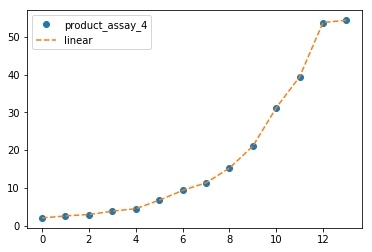

In [46]:
#product_4
f_product_assay_4 = interpolate.interp1d(time_assay_4, product_assay_4,kind = 'linear')
new_time_assay_4 = np.linspace(0, 13,1000)
plt.plot(time_assay_4, product_assay_4, 'o', new_time_assay_4, f_product_assay_4(new_time_assay_4), '--')
plt.legend(['product_assay_4', 'linear'], loc = 'best')
plt.show()

In [47]:
f_product_assay_4(new_time_assay_4)
resid20g_product_assay_4 = f_product_assay_4(new_time_assay_4)[904:905]
resid10g_product_assay_4 = f_product_assay_4(new_time_assay_4)[934:935]
print (resid20g_product_assay_4)
print (resid10g_product_assay_4)

[50.3981982]
[53.89249249]


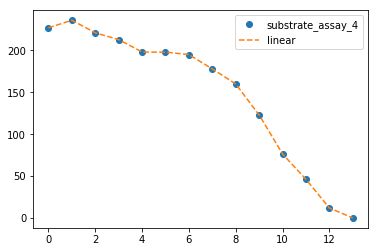

In [48]:
#substrate_4
f_substrate_assay_4 = interpolate.interp1d(time_assay_4, substrate_assay_4,kind = 'linear')
new_time_assay_4 = np.linspace(0, 13,1000)
plt.plot(time_assay_4, substrate_assay_4, 'o', new_time_assay_4, f_substrate_assay_4(new_time_assay_4), '--')
plt.legend(['substrate_assay_4', 'linear'], loc = 'best')
plt.show()

In [49]:
f_substrate_assay_4(new_time_assay_4)
resid20g_substrate_assay_4 = f_substrate_assay_4(new_time_assay_4)[904:905]
resid10g_substrate_assay_4 = f_substrate_assay_4(new_time_assay_4)[934:935]
print (resid20g_substrate_assay_4)
print (resid10g_substrate_assay_4)

[20.0029029]
[10.07388989]


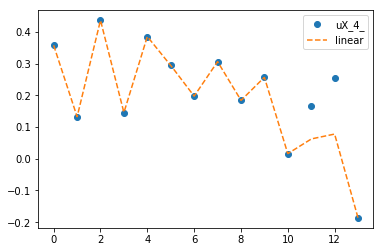

In [50]:
### Replacing values by the mean in time from 10 to 12 hrs
a_uX_4 = np.average(uX_4[10:14])
uX_4_ =  np.where(uX_4==uX_4[11:12],a_uX_4, uX_4)
b_uX_4 = np.average(uX_4[11:14])
uX_4_b =  np.where(uX_4_==uX_4_[12:13],b_uX_4, uX_4_)
f_uX_4 = interpolate.interp1d(time_assay_4, uX_4_b,kind = 'linear')
new_time_assay_4 = np.linspace(0, 13,1000)
plt.plot(time_assay_4, uX_4, 'o', new_time_assay_4, f_uX_4(new_time_assay_4), '--')
plt.legend(['uX_4_', 'linear'], loc = 'best')
plt.show()

In [51]:
resid20g_uX_4 = f_uX_4(new_time_assay_4)[904:905]
resid10g_uX_4 = f_uX_4(new_time_assay_4)[934:935]
print (resid20g_uX_4)
print (resid10g_uX_4)

[0.07421797]
[0.03710995]


# Inhibition Model

In [52]:
#First, we need to concatenate in an unique array the data previously computeted for each condition

# 1. Residual of 20 g/L

product_20mg = np.concatenate ((resid20g_product_assay_1, resid20g_product_assay_2, resid20g_product_assay_3, resid20g_product_assay_4))
print (product_20mg)
uX_20mg = np.concatenate((resid20g_uX_1, resid20g_uX_2, resid20g_uX_3, resid20g_uX_4))
#print(uX_20mg)

substrate_20mg = np.concatenate ((resid20g_substrate_assay_1, resid20g_substrate_assay_2, resid20g_substrate_assay_3, resid20g_substrate_assay_4))
print (substrate_20mg)
uX_20mg = np.concatenate((resid20g_uX_1, resid20g_uX_2, resid20g_uX_3, resid20g_uX_4))

# 2. Residual of 10 g/L

product_10mg = np.concatenate ((resid10g_product_assay_1, resid10g_product_assay_2, resid10g_product_assay_3, resid10g_product_assay_4))
print (product_10mg)
uX_10mg = np.concatenate((resid10g_uX_1, resid10g_uX_2, resid10g_uX_3, resid10g_uX_4))
#print(uX_10mg)

[ 2.0763964  19.82857143 27.78980322 50.3981982 ]
[20.01521522 19.73571429 20.07602862 20.0029029 ]
[ 4.74048048 22.21632653 32.90608229 53.89249249]


### Hyperbolic Inhibition

r value 0.9453722037960169
p_value 0.05462779620398306
standard deviation 0.11638025721300319
slope 0.4772972652352754
intercept -1.4723014597783788


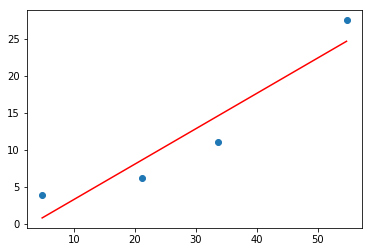

In [53]:
##########Hyperbolic Inhibition: Residual of 10 mg/L (book result)
a = np.array([0.255, 0.161, 0.0901, 0.0364])
x1 = np.array([4.78, 21.2, 33.7, 54.7])
y1 = 1/a
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1+intercept
plt.plot(x1,line,'r-',x1,y1,'o')
plt.show()

r value 0.9378679437993163
p_value 0.06213205620068373
standard deviation 0.12323404867593453
slope 0.4710504837164337
intercept -1.306425978798723


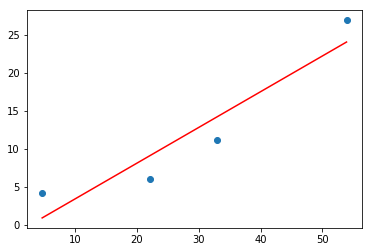

In [54]:
##########Hyperbolic Inhibition: Residual of 10 mg/L (estimated result)

x1 = product_10mg
y1 = 1/uX_10mg
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1+intercept
plt.plot(x1,line,'r-',x1,y1,'o')
plt.show()

r value 0.9645636259951786
p_value 0.035436374004821365
standard deviation 0.0685741869414688
slope 0.35452662607207336
intercept -0.6791212631217824


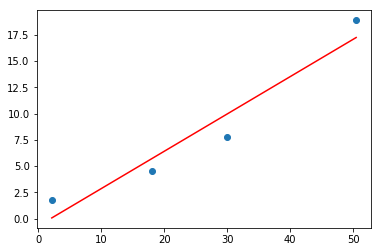

In [55]:
##########Hyperbolic Inhibition: Residual of 20 mg/L (Book Result)
a = np.array([0.565, 0.219, 0.129, 0.053])
x2 = np.array([2.12, 18.0, 30.0, 50.5])
y2 = 1/a
slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x2+intercept
plt.plot(x2,line,'r-',x2,y2,'o')
plt.show()

r value 0.9984535258326726
p_value 0.0015464741673274491
standard deviation 0.009526367969368532
slope 0.24196460651754087
intercept 1.1635028544437596


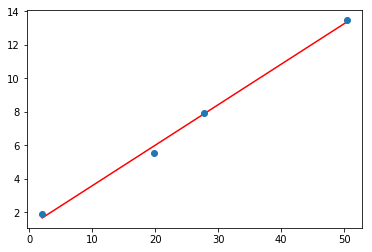

In [56]:
##########Hyperbolic Inhibition: Residual of 20 mg/L (Estimated Result)
x2 = product_20mg
y2 = 1/uX_20mg
slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x2+intercept
plt.plot(x2,line,'r-',x2,y2,'o')
plt.show()

r value 0.9948581093754738
p_value 0.005141890624526191
standard deviation 0.002855237402988037
slope 0.039664405001220884
intercept 1.0940124056222567


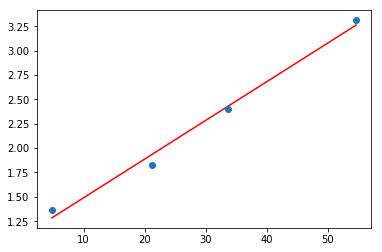

In [57]:
##########Exponential Inhibition: Residual of 10 mg/L (book result)
a = np.array([0.255, 0.161, 0.0901, 0.0364])
x1_b = np.array([4.78, 21.2, 33.7, 54.7])
y1_b = np.log(a)*(-1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x1_b, y1_b)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1_b+intercept
plt.plot(x1_b,line,'r-',x1_b,y1_b,'o')
plt.show()

### Exponential Inhibition

r value 0.9839515246680453
p_value 0.016048475331954744
standard deviation 0.004966763857895453
slope 0.03873288043963714
intercept 1.1352473058021584


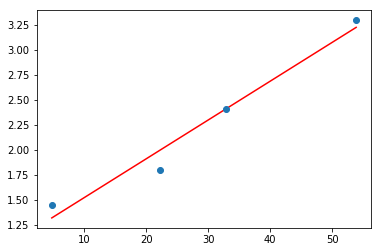

In [58]:
##########Exponential Inhibition: Residual of 10 mg/L (estimated result)

x1_b = product_10mg
y1_b = np.log(uX_10mg)*(-1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x1_b, y1_b)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1_b+intercept
plt.plot(x1_b,line,'r-',x1_b,y1_b,'o')
plt.show()

r value 0.9963387475738489
p_value 0.0036612524261511177
standard deviation 0.002935142610436443
slope 0.048374809868842454
intercept 0.5518864920122211


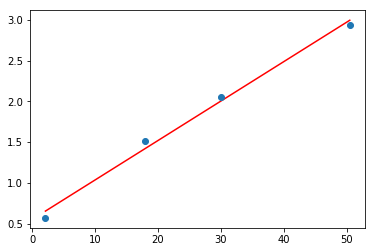

In [59]:
##########Exponential Inhibition: Residual of 20 mg/L (Book Result)
a = np.array([0.565, 0.219, 0.129, 0.053])
x2_c = np.array([2.12, 18.0, 30.0, 50.5])
y2_c = np.log(a)*(-1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x2_c, y2_c)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x2_c+intercept
plt.plot(x2_c,line,'r-',x2_c,y2_c,'o')
plt.show()

r value 0.9654215903047387
p_value 0.03457840969526128
standard deviation 0.007639009089393066
slope 0.04000724654086593
intercept 0.7553987520715584


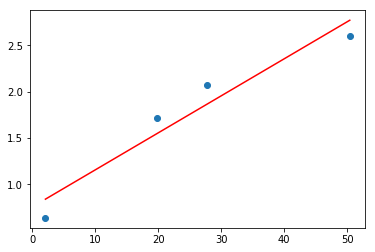

In [60]:
##########Exponential Inhibition: Residual of 20 mg/L (Estimated Result)
x2_c = product_20mg
y2_c = np.log(uX_20mg)*(-1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x2_c, y2_c)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x2_c+intercept
plt.plot(x2_c,line,'r-',x2_c,y2_c,'o')
plt.show()

### Linear Inhibition

r value -0.9804036695714139
p_value 0.019596330428586103
standard deviation 0.0006255958128553354
slope -0.004403008472494876
intercept 0.261529027270991


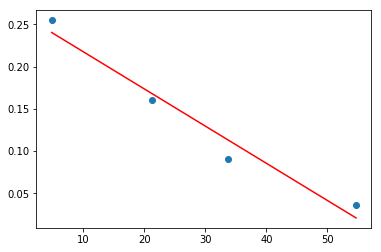

In [61]:
##########Linear Inhibition: Residual of 10 mg/L (book result)
x1_d = np.array([4.78, 21.2, 33.7, 54.7])
y1_d = np.array([0.255, 0.161, 0.0901, 0.0364])
slope, intercept, r_value, p_value, std_err = stats.linregress(x1_d, y1_d)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1_d+intercept
plt.plot(x1_d,line,'r-',x1_d,y1_d,'o')
plt.show()

r value -0.9827836148039194
p_value 0.017216385196080593
standard deviation 0.0005510102573902247
slope -0.004144994346041807
intercept 0.2498988742441608


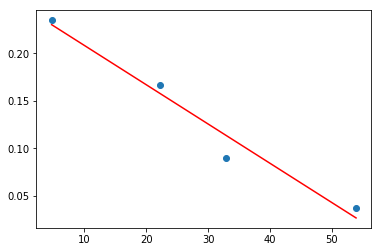

In [62]:
##########Linear Inhibition: Residual of 10 mg/L (estimated result)
x1_d = product_10mg
y1_d = uX_10mg
slope, intercept, r_value, p_value, std_err = stats.linregress(x1_d, y1_d)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1_d+intercept
plt.plot(x1_d,line,'r-',x1_d,y1_d,'o')
plt.show()

r value -0.9119047328377609
p_value 0.08809526716223913
standard deviation 0.0032172585762086105
slope -0.010109764105798086
intercept 0.49581111608135087


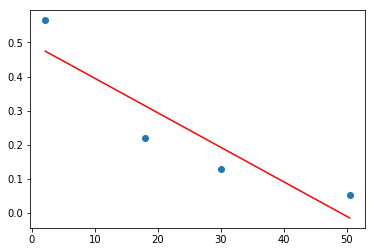

In [63]:
##########Linear Inhibition: Residual of 20 mg/L (book result)
x1_e = np.array([2.12, 18.0, 30.0, 50.5])
y1_e = np.array([0.565, 0.219, 0.129, 0.053])
slope, intercept, r_value, p_value, std_err = stats.linregress(x1_e, y1_e)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1_e+intercept
plt.plot(x1_e,line,'r-',x1_e,y1_e,'o')
plt.show()

r value -0.8760648769078043
p_value 0.12393512309219568
standard deviation 0.0035041583303393404
slope -0.009003551646169668
intercept 0.4525815387315892


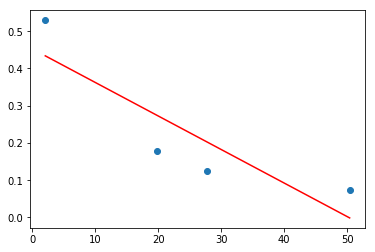

In [64]:
##########Linear Inhibition: Residual of 20 mg/L (estimated result)
x1_e = product_20mg
y1_e = uX_20mg
slope, intercept, r_value, p_value, std_err = stats.linregress(x1_e, y1_e)
print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope', slope)
print ('intercept', intercept)
line = slope*x1_e+intercept
plt.plot(x1_e,line,'r-',x1_e,y1_e,'o')
plt.show()

                        ...this notebook is open to contribution to continue its solution!
 
                                                                      PERAZZOLI, Simone